In [253]:
from dec.symbolic import *
from dec.grid1 import Grid_1D
from dec.grid2 import Grid_2D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
%matplotlib inline

In [254]:
def format_fig(g, plot):
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    plot(ax)
    plt.xlim(g.gx.xmin, g.gx.xmax)
    plt.ylim(g.gy.xmin, g.gy.xmax)
    ax.axes.set_aspect('equal')

In [255]:
def plot_grid(ax, g):
    ax.scatter(*g.verts, marker='o', c='black', s=30)
    ax.scatter(*g.verts_dual, marker='o', c='red', s=30, alpha=0.4)

    lines = np.rollaxis(np.array(g.edges), 2, 0)
    lc = mc.LineCollection(lines, colors='black')
    ax.add_collection(lc)

    lines = np.rollaxis(np.array(g.edges_dual), 2, 0)
    lc = mc.LineCollection(lines, colors='red', alpha=0.4)
    ax.add_collection(lc)

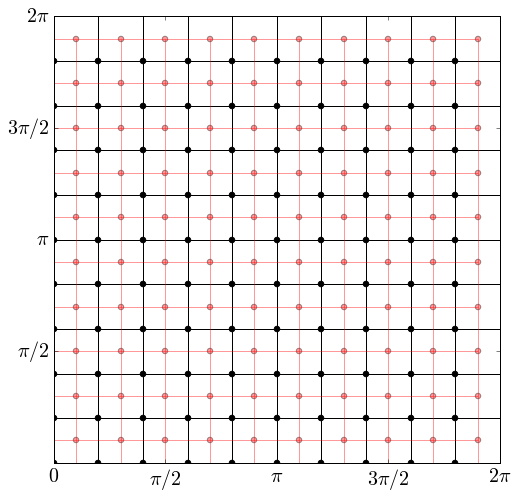

In [256]:
c = Chart(x,y)
g = Grid_2D.periodic(10, 10)
def p(ax):
    plot_grid(ax, g)
    pi = np.pi
    ax.set_xticks((0, pi/2, pi, 3*pi/2, 2*pi))
    ax.set_yticks((0, pi/2, pi, 3*pi/2, 2*pi))
    ax.set_xticklabels(('$0$','$\pi/2$','$\pi$','$3\pi/2$','$2\pi$',), size=20)
    ax.set_yticklabels(('','$\pi/2$','$\pi$','$3\pi/2$','$2\pi$',), size=20)
format_fig(g, p) 

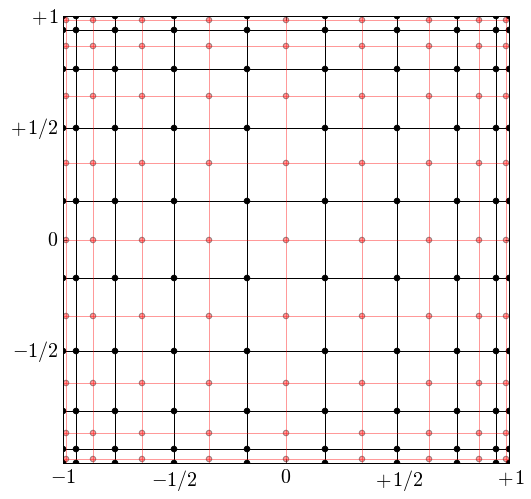

In [257]:
c = Chart(x,y)
g = Grid_2D.chebyshev(10, 10)
def p(ax):
    plot_grid(ax, g)
    ax.set_xticks((-1., -.5, .0, .5, 1.))
    ax.set_yticks((-1., -.5, .0, .5, 1.))
    ax.set_xticklabels(('$-1$','$-1/2$','$0$','$+1/2$','$+1$',), size=20)
    ax.set_yticklabels(('','$-1/2$','$0$','$+1/2$','$+1$',), size=20)
format_fig(g, p) 

In [258]:
(x0,y0), (x1, y1) = g.edges
np.array(g.edges).shape
e = np.array(g.edges)
e= np.rollaxis(e, 2, 0)
e= np.rollaxis(e, 2, 1)
e.shape

(180, 2, 2)

In [259]:
def get_meshgrid(N, M):
    X, Y = np.meshgrid(np.linspace(g.gx.xmin, g.gx.xmax, N),
                       np.linspace(g.gy.xmin, g.gy.xmax, M))
    return X, Y
XX, YY = get_meshgrid(100, 100)
X, Y = get_meshgrid(20, 20)

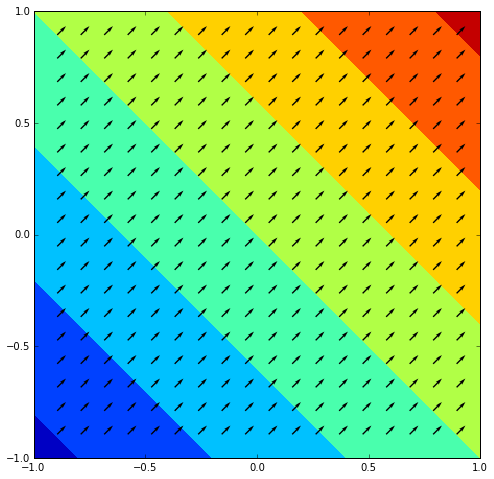

In [260]:
f = form(0, c, (x+y,)).decform(g, True)
def p(ax):
    ax.contourf(XX, YY, f.R(XX, YY))
    ax.quiver(X, Y, *f.D.R(X, Y), color='black')
format_fig(g, p)

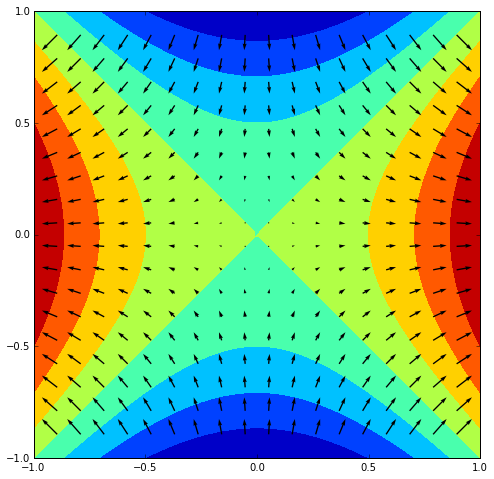

In [261]:
f = form(0, c, (x**2-y**2,)).decform(g, True)
def p(ax):
    ax.contourf(XX, YY, f.R(XX, YY))
    ax.quiver(X, Y, *f.D.R(X, Y), color='black')
format_fig(g, p)

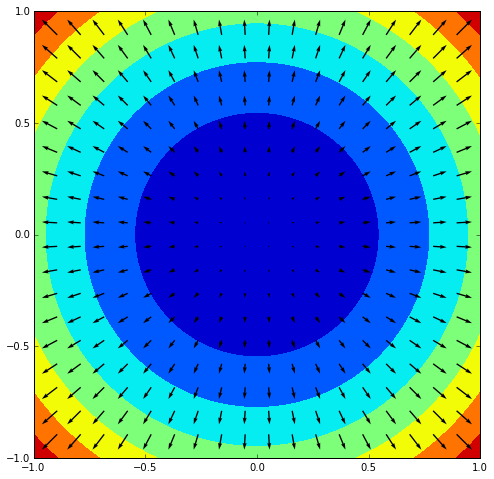

In [269]:
f = form(0, c, (x**2+y**2,)).decform(g, True)
def p(ax):
    ax.contourf(XX, YY, f.R(XX, YY))
    ax.quiver(X, Y, *f.D.R(X, Y), color='black')
format_fig(g, p)

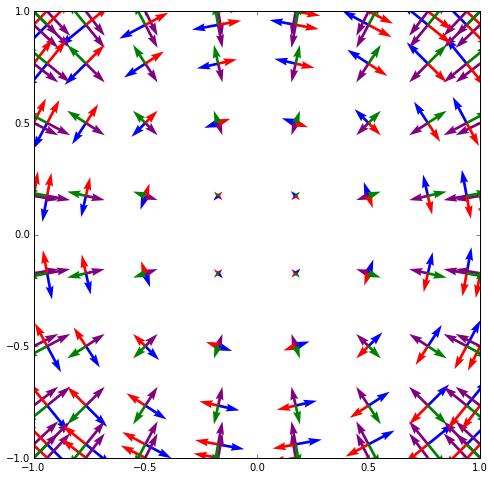

In [263]:
f = form(1, c, (1,0)).decform(g, True)
def p(ax):
    xx, yy = g.verts
    ax.quiver(xx, yy, *f.R(xx, yy), color='blue')
    ax.quiver(xx, yy, *f.H.R(xx, yy), color='purple')
    ax.quiver(xx, yy, *f.H.H.R(xx, yy), color='red')
    ax.quiver(xx, yy, *f.H.H.H.R(xx, yy), color='green')
format_fig(g, p)

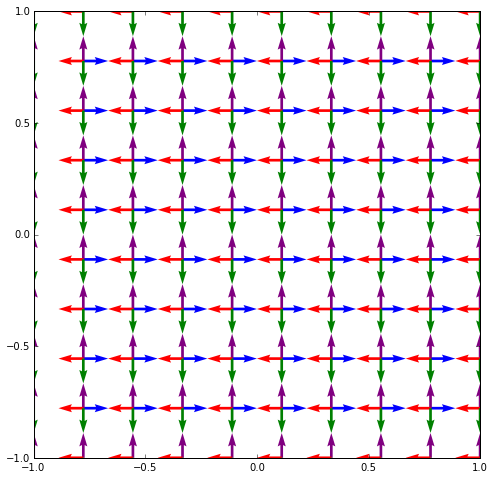

In [264]:
f = form(1, c, (1,0)).decform(g, True)
def p(ax):
    X, Y = get_meshgrid(10, 10)
    ax.quiver(X, Y, *f.R(X, Y), color='blue')
    ax.quiver(X, Y, *f.H.R(X, Y), color='purple')
    ax.quiver(X, Y, *f.H.H.R(X, Y), color='red')
    ax.quiver(X, Y, *f.H.H.H.R(X, Y), color='green')
format_fig(g, p)

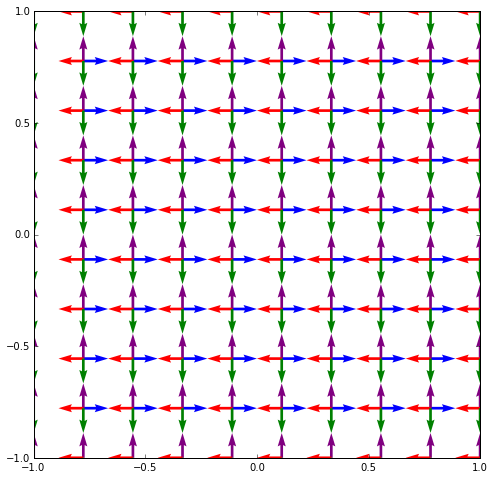

In [265]:
f = form(1, c, (-y,x)).decform(g, True)
def p(ax):
    X, Y = get_meshgrid(10, 10)
    ax.quiver(X, Y, *f.R(X, Y), color='blue')
    ax.quiver(X, Y, *f.H.R(X, Y), color='purple')
    ax.quiver(X, Y, *f.H.H.R(X, Y), color='red')
    ax.quiver(X, Y, *f.H.H.H.R(X, Y), color='green')
format_fig(g, p)

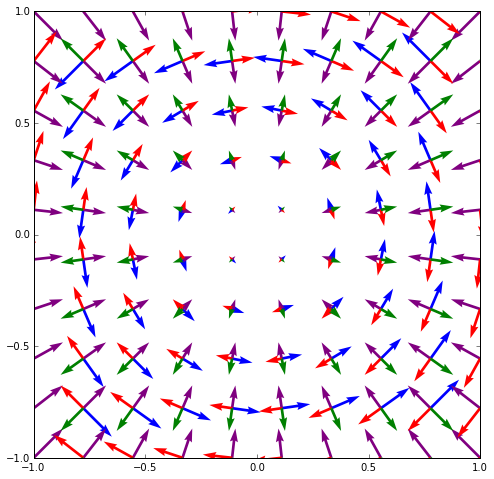

In [266]:
f = form(1, c, (x, y)).decform(g, True)
def p(ax):
    X, Y = get_meshgrid(10, 10)
    ax.quiver(X, Y, *f.R(X, Y), color='blue')
    ax.quiver(X, Y, *f.H.R(X, Y), color='purple')
    ax.quiver(X, Y, *f.H.H.R(X, Y), color='red')
    ax.quiver(X, Y, *f.H.H.H.R(X, Y), color='green')
format_fig(g, p)